## Advanced Numpy Concept.

### Numpy array vs Python lists.

1. Speed

In [1]:
# List.

import time

List1 = [x for x in range(1, 10000000)]
List2 = [x for x in range(10000000, 20000000)]

ans = [] 

start = time.time()
for i in range(len(List1)): 
    ans.append(List1[i] + List2[i])
print(time.time() - start)

2.444322109222412


In [3]:
# Numpy Array. 
import numpy as np
import time

arr1 = np.arange(10000000)
arr2 = np.arange(10000000, 20000000)

start = time.time()
ans = arr1 + arr2
print(time.time() - start)

0.023390531539916992


In [6]:
# how much faster a numpy array is from List. 
times_faster = 2.44 / 0.02
times_faster

122.0

2. Memory

In [8]:
# List. 
import sys

List1 = [x for x in range(10000000)]

print(sys.getsizeof(List1), 'Bytes')

89095160 Bytes


In [12]:
# Numpy array. 

arr1 = np.arange(10000000)
arr2 = np.arange(10000000, dtype = np.int32)
arr3 = np.arange(10000000, dtype = np.int16) 
arr4 = np.arange(10000000, dtype = np.int8)
print(sys.getsizeof(arr1), 'Bytes for 64 bit integer')
print(sys.getsizeof(arr2), 'Bytes for 32 bit integer') 
print(sys.getsizeof(arr3), 'Bytes for 16 bit integer') 
print(sys.getsizeof(arr4), 'Bytes for 8 bit integer')

80000112 Bytes for 64 bit integer
40000112 Bytes for 32 bit integer
20000112 Bytes for 16 bit integer
10000112 Bytes for 8 bit integer


`NOTE : ` 
- Numpy array gives us a flexibility to reduce the size of the array, by reducing its size to lower type.

- Numpy array is more convinient than the List of python, this is also an edge of numpy array over python list.

### Advanced Indexing.
1. Fancy indexing
2. Boolean Indexing

In [15]:
# Normal indexing and Normal slicing. 
a1 = np.arange(24).reshape(4, 3, 2)
a1

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]]])

In [18]:
# Normal Indexing 
print(a1[2, 1, 1])   # 15
print(a1[3, 0, 0])   # 18

15
18


In [21]:
# Normal Slicing. 
print(a1[1 : : 2, 0, : ])
print("**" * 68)
print(a1[1 : , 0, 1])

[[ 6  7]
 [18 19]]
****************************************************************************************************************************************
[ 7 13 19]


In [28]:
# <!-- Fancy indexing -->
a1[[0, 3], [1], [1]]

array([ 3, 21])

In [31]:
a2 = np.arange(27).reshape(9, 3)
a2

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17],
       [18, 19, 20],
       [21, 22, 23],
       [24, 25, 26]])

In [33]:
# Fancy indexing in 2D array 
a2[[1, 4, 5, 6], [1]]

array([ 4, 13, 16, 19])

`NOTE : `
Syntax of Fancy Indexing : ---> 
array_name[[list of array], [list of rows], [list of columns]]

#### How to generate a random number array in a given interval.

In [43]:
arr1 = np.random.randint(1, 100, 20)
arr1

array([69, 43, 80, 72, 90, 13, 59, 65, 22, 62, 97, 58,  9, 58, 67, 85, 29,
       74, 52, 27], dtype=int32)

In [48]:
# Boolean indexing. 

# it will generate a boolean array, where True is show for that value where the given condition is true. 
arr1 >= 50

array([ True, False,  True,  True,  True, False,  True,  True, False,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True, False])

In [49]:
# Now we will mask this array to the original array, to find the element for which the given condition is true. 
arr1[arr1 >= 50]

array([69, 80, 72, 90, 59, 65, 62, 97, 58, 58, 67, 85, 74, 52],
      dtype=int32)

In [59]:
# New Condtion  --- >  find all numbers greater than 50 and are even. 
(arr1 > 50) & (arr1 % 2 == 0)

array([False, False,  True,  True,  True, False, False, False, False,
        True, False,  True, False,  True, False, False, False,  True,
        True, False])

`NOTE : ` Here always used the bitwise operator( & , | ) in between the conditions.

In [61]:
# Now we can mask this array to the original array. 
arr1[(arr1 > 50) & (arr1 % 2 == 0)]

array([80, 72, 90, 62, 58, 58, 74, 52], dtype=int32)

In [62]:
# find all numbers not divisible by 7. 
~(arr1 % 7 == 0)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [63]:
arr1[~(arr1 % 7 == 0)]

array([69, 43, 80, 72, 90, 13, 59, 65, 22, 62, 97, 58,  9, 58, 67, 85, 29,
       74, 52, 27], dtype=int32)

### Broadcasting

The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations.

The smaller array is “broadcast” across the larger array so that they have compatible shapes.

In [68]:
# same shape. 

arr1 = np.arange(6).reshape(2, 3)
arr2 = np.arange(6).reshape(2, 3)

print(arr1)
print('**' * 68)
print(arr2)

print('**' * 68)
print(arr1 + arr2)

[[0 1 2]
 [3 4 5]]
****************************************************************************************************************************************
[[0 1 2]
 [3 4 5]]
****************************************************************************************************************************************
[[ 0  2  4]
 [ 6  8 10]]


In [69]:
# Different shape. 
a = np.arange(6).reshape(2, 3)
b = np.arange(3).reshape(1, 3)

print(a + b)

[[0 2 4]
 [3 5 7]]


#### Broadcasting Rules

**1. Make the two arrays have the same number of dimensions.**<br>
- If the numbers of dimensions of the two arrays are different, add new dimensions with size 1 to the head of the array with the smaller dimension.<br>

**2. Make each dimension of the two arrays the same size.**<br>
- If the sizes of each dimension of the two arrays do not match, dimensions with size 1 are stretched to the size of the other array.
- If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised.

<img src = "https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png">

In [73]:
# Example 1

a = np.arange(12).reshape(4,3)
b = np.arange(3)

print(a)
print('*')
print(b)

print('*')
print(a + b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
*
[0 1 2]
*
[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [80]:
# Example 2
a = np.arange(12).reshape(3,4)
b = np.arange(3)

print(a)
print(b)

print('*')
print(a + b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[0 1 2]
*


ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [81]:
# Example 3
a = np.arange(3).reshape(1,3)
b = np.arange(3).reshape(3,1)

print(a)
print(b)

print('*')
print(a + b)

[[0 1 2]]
[[0]
 [1]
 [2]]
*
[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [82]:
# Example 4 
a = np.arange(3).reshape(1,3)
b = np.arange(4).reshape(4,1)

print(a + b)

[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


In [83]:
# Example 5
a = np.array([1])
# shape -> (1,1)
b = np.arange(4).reshape(2,2)
# shape -> (2,2)

print(a)
print(b)

print(a+b)

[1]
[[0 1]
 [2 3]]
[[1 2]
 [3 4]]


In [84]:
# Example 6
a = np.arange(12).reshape(3,4)
b = np.arange(12).reshape(4,3)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


ValueError: operands could not be broadcast together with shapes (3,4) (4,3) 

In [85]:
# Example 7
a = np.arange(16).reshape(4,4)
b = np.arange(4).reshape(2,2)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[0 1]
 [2 3]]


ValueError: operands could not be broadcast together with shapes (4,4) (2,2) 

### Working with mathematical formulas.
1. Sigmoid Function :-  ( Its values is always betwwen 0 and 1 ).
2. Mean Squared Error
3. Binary Cross Entropy  :- (Loss function of the Logistic Regression).

In [93]:
arr = np.random.randint(1, 10, 20)

In [109]:
# Sigmoid function.
def sigmoid(x):
    return 1 / (1 + np.exp(-1 * x))


x = np.random.randint(1, 10, 10)
print('Values of x : ', x)
print('Sigmoid Values corrosponding to the x values : ', sigmoid(x))

Values of x :  [6 1 3 1 7 9 2 8 2 9]
Sigmoid Values corrosponding to the x values :  [0.99752738 0.73105858 0.95257413 0.73105858 0.99908895 0.99987661
 0.88079708 0.99966465 0.88079708 0.99987661]


In [117]:
# Mean Square Error (MSE). 
def mse(actual_values, predicted_values): 
    ans = np.mean((actual_values - predicted_values)**2)
    return ans

actual_values = np.random.randint(1, 100, 5)
predicted_values = np.random.randint(1, 100, 5)
print(actual_values)
print(predicted_values)
print(mse(actual_values, predicted_values))

[54 76 34 74 19]
[81 90 19 86 85]
1130.0


In [181]:
# Binary Cross Entropy.
def binary_cross_entropy(actual, predicted):
    return -1 * np.mean(actual * np.log(predicted) + (1 - actual) * np.log(1 - predicted))


actual = np.random.randint(0, 2, 20)
predicted = np.round(np.random.random(20), 2)
# print(actual)
# print(predicted)

print(binary_cross_entropy(actual, predicted))

1.035909147875966


### Working with missing values. 

In [131]:
# Working with missing values -> np.nan. 
arr = np.array([1, 2, 3, 4, np.nan, 5])
arr

array([ 1.,  2.,  3.,  4., nan,  5.])

In [132]:
arr[~np.isnan(arr)]

array([1., 2., 3., 4., 5.])

### Plotting Graphs. 
- plotting a 2D plot

`NOTE : ` When we are generating data for plot a graph always generate data by using linspace() function.

In [139]:
# To plat a graph we need a library called Matplotlib.
import matplotlib.pyplot as plt

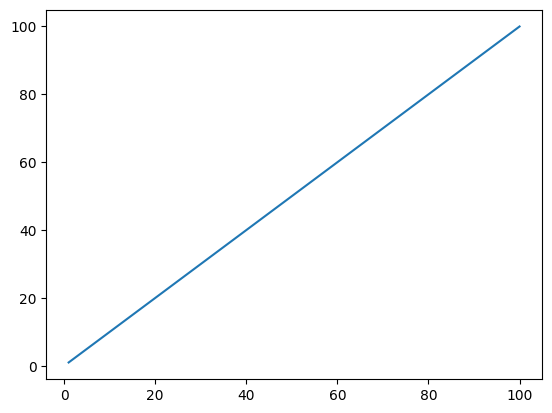

In [142]:
# <!-- Plot for x = y --> 

x = np.linspace(1, 100, 50)
y = x 

plt.plot(x, y)
plt.show()

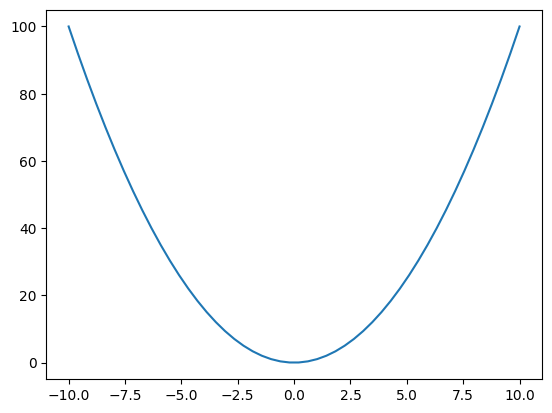

In [153]:
# <!-- Plot for y = x^2 -->

x = np.linspace(-10, 10, 50)
y = x ** 2

# print(x)
# print(y)

plt.plot(x, y)
plt.show()

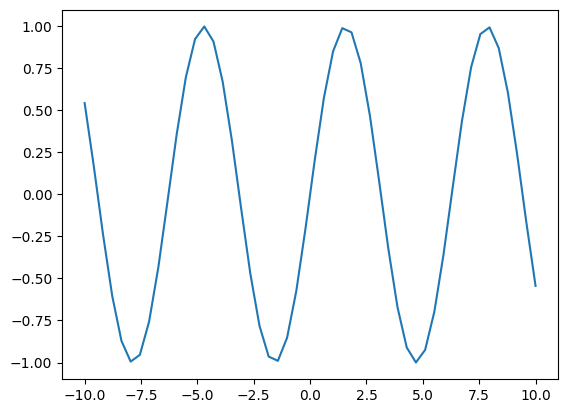

In [154]:
# <!-- Plot for y = sin(x) -->

x = np.linspace(-10, 10, 50)
y = np.sin(x) 

# print(x) 
# print(y)  

plt.plot(x, y) 
plt.show()

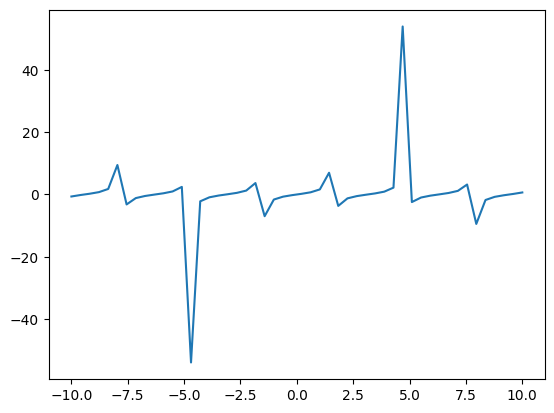

In [155]:
# <!-- Plot for y = tan(x) -->

x = np.linspace(-10, 10, 50)
y = np.tan(x) 

# print(x) 
# print(y)  

plt.plot(x, y) 
plt.show()

[-10.          -9.59183673  -9.18367347  -8.7755102   -8.36734694
  -7.95918367  -7.55102041  -7.14285714  -6.73469388  -6.32653061
  -5.91836735  -5.51020408  -5.10204082  -4.69387755  -4.28571429
  -3.87755102  -3.46938776  -3.06122449  -2.65306122  -2.24489796
  -1.83673469  -1.42857143  -1.02040816  -0.6122449   -0.20408163
   0.20408163   0.6122449    1.02040816   1.42857143   1.83673469
   2.24489796   2.65306122   3.06122449   3.46938776   3.87755102
   4.28571429   4.69387755   5.10204082   5.51020408   5.91836735
   6.32653061   6.73469388   7.14285714   7.55102041   7.95918367
   8.36734694   8.7755102    9.18367347   9.59183673  10.        ]


C:\Users\Mohd Uzaif\AppData\Local\Temp\ipykernel_12588\4152129956.py:4: RuntimeWarning: invalid value encountered in log
  y = x * np.log(x)


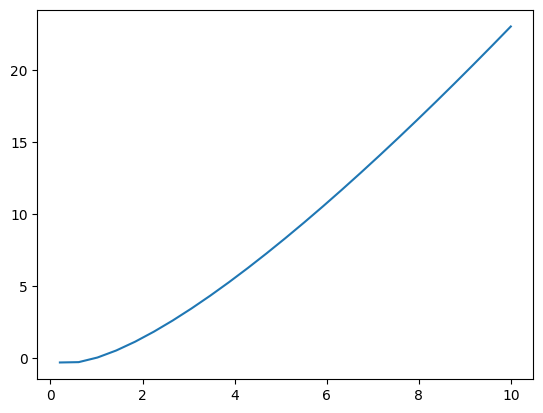

In [163]:
# <!-- Plot for y = x * log(x) -->

x = np.linspace(-10, 10, 50)
y = x * np.log(x)

# print(x) 
# print(y)  

plt.plot(x, y) 
plt.show()

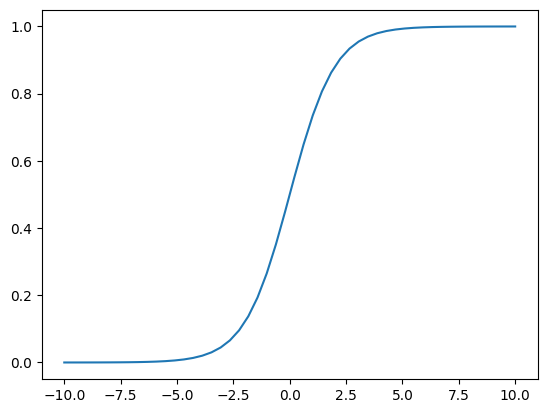

In [166]:
# <!-- Plot for y = sigmoid(x) -->

x = np.linspace(-10, 10, 50)
y = 1 / (1 + np.exp(-x))

# print(x) 
# print(y)  

plt.plot(x, y) 
plt.show()